In [2]:
# !pip install bs4
# !pip install requests
from bs4 import BeautifulSoup
import requests
import numpy as np
#start off with a simple example
header = {
    "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.108 Safari/537.36Name"
}

url = "http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page3/res/temp"

content = requests.get(url,headers =header ).text
soup = BeautifulSoup(content,"html.parser")

In [3]:
url_list = []
for index in range(1,10):
    url = "http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page{}/res/temp".format(index)
    url_list.append(url)
    print (url)

http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page1/res/temp
http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page2/res/temp
http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page3/res/temp
http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page4/res/temp
http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page5/res/temp
http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page6/res/temp
http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page7/res/temp
http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page8/res/temp
http://www.stjobs.sg/singapore-jobs/temporary-part-time-jobs-singapore/page9/res/temp


In [4]:
#write a function to convert each URL into a soup

header = header = {
    "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.108 Safari/537.36Name"
}

def get_soup(url):
    content = requests.get(url,headers =header ).text
    soup = BeautifulSoup(content,"html.parser")
    return soup

#create empty list to store all the urls
job_details_url = []


#obtain the details link of each url, add it to the base link to get the full link

base_url = "http://www.stjobs.sg"
for url in url_list:
    soup = get_soup(url)
    a_list = soup.find_all("a",{"class":"view_companyprofile"}) #obtain the other part of the link to the job

    for tag in a_list:
        add_link = tag.get("href")
        full_link = base_url + add_link
        print (tag.text),full_link
        job_details_url.append((tag.text,full_link))

Resident Physician/Senior Resident Physician http://www.stjobs.sg/resident-physician-senior-resident-physician-job/view-job/1624539
Customer Service Executive //Shipping Executive[ Freight Forwarding/ BL / LC ] http://www.stjobs.sg/customer-service-executive-shipping-executive-freight-forwarding-bl-lc-job/view-job/1624519
Retail Pharmacy Assistants *OFFICE HOURS*  http://www.stjobs.sg/retail-pharmacy-assistants-office-hours-job/view-job/1623383
Clinic Assistant/Patient Service Clerk *OFFICE HOURS*  http://www.stjobs.sg/clinic-assistant-patient-service-clerk-office-hours-job/view-job/1623384
Admin Assistant / HR Assistant  - 3-6 MONTHS *HEALTHCARE* http://www.stjobs.sg/admin-assistant-hr-assistant-3-6-months-healthcare-job/view-job/1623385
Accounts Assistant **HEALTHCARE** http://www.stjobs.sg/accounts-assistant-healthcare-job/view-job/1623386
Call Centre Associate *TEMP/PERM, IMMEDIATE* (HEALTHCARE) http://www.stjobs.sg/call-centre-associate-temp-perm-immediate-healthcare-job/view-job/

Dental Assistant *OFFICE HOURS* *IMMEDIATE* http://www.stjobs.sg/dental-assistant-office-hours-immediate-job/view-job/1622990
Nurse Manager *5 days office hours* (OUTPATIENT CLINICS) http://www.stjobs.sg/nurse-manager-5-days-office-hours-outpatient-clinics-job/view-job/1622992
Clinic Assistant/Patient Service Clerk *OFFICE HOURS*  http://www.stjobs.sg/clinic-assistant-patient-service-clerk-office-hours-job/view-job/1622994
Kitchen Assistant (Western Cuisine) http://www.stjobs.sg/kitchen-assistant-western-cuisine-job/view-job/1622861
FREELANCE Qualified teachers http://www.stjobs.sg/freelance-qualified-teachers-job/view-job/1622678
SERVICE CREWS http://www.stjobs.sg/service-crews-job/view-job/1622650
Accounts Officer/ Executive (Partial Set) (Ref: JTL) http://www.stjobs.sg/accounts-officer-executive-partial-set-ref-jtl-job/view-job/1621950
Planner (Contract/ Perm) (US MNC) (Ref: JTL)  http://www.stjobs.sg/planner-contract-perm-us-mnc-ref-jtl-job/view-job/1621951
Contract Healthcare Atte

In [5]:
len(job_details_url)

90

In [27]:
salary_list = []
location_list = []
type_work_list = []
education_list=[]
field_study_list = []
experience_list = []
skills_list=[]
title_list = []
company_name_list = []       
posted_on_list = []

for details in job_details_url: #this list consists of both the text  and url
    url_details = details[-1]
    soup_details = get_soup(url_details) #now do the same thing but with the details link
    

        
    #why does this not work? difference in just text and .text()? attribute and not function?
        
    '''
    title_name = title.find("h3",{"class":"text-primary"})    
    title = title_name.text()
        '''
    #get the title
    
    
    ##get the company details
  # ''' title_box = soup_details.find("div", {"class": "title-page"})''''''
      # ''' if title_box:
       # job_title = title_box.find("h3").text
        #titles = job_title
        #title_list.append(titles)
    
        #get the company name
#         company_name_h4 = title_box.find("h4")
#         company_details = company_name_h4.text.split("Posted On :")
#         company_name = company_details[0].strip()
#         company_name_list.append(company_name)
#         posted_on = company_details[1].strip()
#         posted_on_list.append(posted_on)'''
     
    company_information = soup_details.find("div",{"class":"job-summary"})
    list_information= company_information.text.strip().split(":")
    if len(list_information) >=7:
        # get the title
        title_box = soup_details.find("div", {"class": "title-page"})
        if title_box:
            job_title = title_box.find("h3").text
            titles = job_title
            title_list.append(titles)
            
        #get the company name
        company_name_h4 = title_box.find("h4")
        company_details = company_name_h4.text.split("Posted On :")
        company_name = company_details[0].strip()
        company_name_list.append(company_name)
        posted_on = company_details[1].strip()
        posted_on_list.append(posted_on)
        
        #print list_information
        salary = list_information[1]
        salary_list.append(salary)
        
        location= list_information[2]
        location_list.append(location)
        
        type_work = list_information[3]
        type_work_list.append(type_work)
        
        education = list_information[4]
        education_list.append(education)
        
        field_study = list_information[5]   
        field_study_list.append(field_study)
        
        years_experience = list_information[-2]
        experience_list.append(years_experience)
        
        skills = list_information[-1]
        skills_list.append(skills)

        
        
'''    row  = (,,,,None,[skill1.skill2],0,)'''
'''        
1 salary
2 location
3 type work
4 education
5 field of study
6 experience
7 skills
'''


    
# print salary_list
# print skills_list
    #print list_information[1]

    #print list_information 

#     if len(list_information) == 5:
#         salary = list_information[1]
#         print salary
      #  print salary
#             salary_list.append(salary)
#             location = list_one[2]
#             type_work = list_one[3]
#             education_level = list_one[4]
#             skills = list_one[5]
        



    
# print (list_information)
# print (type(list_information))
# salary = list_information[1]
# location = list_information[2]
# type_work = list_information[3]
# education_level =list_information[4]
# skills = list_information[5]

# print (salary)
# print (location)
# print (type_work)
# print (education_level)
# print (skills)

# total = [salary,location,type_work,education_level,skills]

    

    

'        \n1 salary\n2 location\n3 type work\n4 education\n5 field of study\n6 experience\n7 skills\n'

In [49]:
#new lists to be used for appending
salary_int_list = []
location_list_new = []
type_work_list_new = []
experience_list_new=[]
field_study_list_new = []
skills_list_new=[]
title_list_new=[]
post_list_new=[]
company_list_new=[]


#cleaning salary to only be integers or undisclosed
for item in salary_list:
    item_new=item.split()
    salary_int = item_new[0]
    #print salary_int
    salary_int_list.append(salary_int)

# cleaning location to reflect area  or Singapore if not stated otherwise    
for item in location_list:
        item_new = item.split("-")
        if len(item_new) >= 2:
            location = item_new[1]
            #print location
            location_list_new.append(location)
        else:
            location = "Singapore"
            location_list_new.append(location)
            
#clean type of work
for item in type_work_list:
    type_work = item.split(",")
    type_work_new = type_work[0]
    type_work_list_new.append(type_work_new)

#clean experience and return only numbers, return 0 if not stated otherwise:
for item in experience_list:
    experience = item.split(",")
    print experience
    #for item in experience:
    unit = item.split()
    exp_test=unit[0]
    if exp_test.isdigit(): #boolean
        exp_test = exp_test
    else:
        exp_test = 0
    #print exp_test
    experience_list_new.append(exp_test)

    #test_boolean = exp_testnew.isdigit()
        
#clean field study    
for item in field_study_list:
    line = item.split(",")
    #print line
    for i in line:
        words = i.split()
        study = words[0]
        field_study_list_new.append(study)

#clean skills_list
for item in skills_list:
        line = item.split(",")
        skills_list_new.append(line)
        
#clean title_list
for line in title_list:
    title= line.split(",")
    title_list_new.append(title)
#clean posted on
for line in posted_on_list:
    post = line.split(",")
    post_list_new.append(post)
for line in company_name_list:
    company  = line.split(",")
    company_list_new.append(company)

[u'  3 Skills']
[u'  2 Skills']
[u'   Not Applicable Skills']
[u'   Not Applicable Skills']
[u'  1 Skills']
[u'  2 Skills']
[u'  1 Skills']
[u'   Not Applicable Skills']
[u'  1 Skills']
[u'   Pharmacy ', u' Biomedical Sciences & Chinese Medicine Skills']
[u'   Not Applicable Skills']
[u'   Nursing  Skills']
[u'   Not Applicable Skills']
[u'   Not Applicable Skills']
[u'  3 Skills']
[u'  2 Skills']
[u'  1 Skills']
[u'  1 Skills']
[u'   Not Applicable Skills']
[u'   Art Skills']
[u'  3 Skills']
[u'  2 Skills']
[u'  8 Skills']
[u'  1 Skills']
[u'  1 Skills']
[u'   Not Applicable Skills']
[u'  1 Skills']
[u'   Not Applicable Skills']
[u'   Not Applicable Skills']
[u'   Not Applicable Skills']
[u'   Not Applicable Skills']
[u'   Not Applicable Skills']
[u'  1 Skills']
[u'   Nursing  Skills']
[u'  1 Skills']
[u'   Not Applicable Skills']
[u'  1 Skills']
[u'  5 Skills']
[u'   Not Applicable Skills']
[u'   Not Applicable Skills']
[u'  2 Skills']
[u'   Not Applicable Skills']
[u'  1 Skills']
[u

In [ ]:
salary_int_list = []
location_list_new = []
type_work_list_new = []
experience_list_new=[]
field_study_list_new = []
skills_list_new=[]
title_list_new=[]
post_list_new=[]
company_list_new=[]


In [47]:
print len(salary_int_list)
print len(title_list_new)
print len(location_list_new)
print len(experience_list_new)
print len(skills_list_new)
print len(company_list_new)
print len(post_list_new)
print len(field_study_list_new)

84
84
84
84
84
84
84
89


In [44]:
pd_type_work

0                             Permanent / Full Time
1                             Permanent / Full Time
2                             Permanent / Full Time
3                             Permanent / Full Time
4                             Permanent / Full Time
5                             Permanent / Full Time
6                             Permanent / Full Time
7                             Permanent / Full Time
8                             Permanent / Full Time
9                             Temporary / Part Time
10                            Temporary / Part Time
11                            Permanent / Full Time
12                            Temporary / Part Time
13                            Permanent / Full Time
14                            Temporary / Part Time
15                            Permanent / Full Time
16                  'N' / 'O' Levels Field of Study
17                            Permanent / Full Time
18                            Temporary / Part Time
19          

In [107]:
import pandas as pd
pd_salary = pd.Series(salary_int_list)
pd_location = pd.Series(location_list_new)
pd_type_work = pd.Series(type_work_list_new)
#pd_education = pd.Series(education_list_new)
pd_fieldstudy = pd.Series(field_study_list_new)
pd_experience = pd.Series(experience_list_new,dtype = "category")
pd_skills = pd.Series(skills_list_new)
pd_title = pd.Series(title_list)
pd_companyname = pd.Series(company_name_list)
pd_postedon = pd.Series(posted_on_list)

array_salary = np.asarray(salary_int_list)
array_title = np.asarray(title_list)
array_post = np.asarray(posted_on_list)
array_exp = np.asarray(experience_list_new)
print type(array_title)


#type(title_list)
pd_Dataframe = pd.DataFrame(data={"Title":array_title,"Company Name":pd_companyname, "Posted On":pd_postedon,
                                  "Location":pd_location,"Salary":array_salary,"Experience":array_exp
                                  })
#print pd_Dataframe
#print pd_Dataframe

# a= pd.DataFrame({"Title":array_title})
# b = pd.DataFrame({"Post":post_list_new})
# c = pd.concat([a,b,pd_salary],axis=1)
# print type(c)
'''
salary_int_list = []
location_list_new = []
type_work_list_new = []
experience_list_new=[]
field_study_list_new = []
skills_list_new=[]
title_list = []
company_name_list = []       
posted_on_list = []
'''



'''
salary_list = []
location_list = []
type_work_list = []
education_list=[]
field_study_list = []
experience_list = []
skills_list=[]

'''

<type 'numpy.ndarray'>


'\nsalary_list = []\nlocation_list = []\ntype_work_list = []\neducation_list=[]\nfield_study_list = []\nexperience_list = []\nskills_list=[]\n\n'

In [108]:
pd_Dataframe = pd_Dataframe[[u'Company Name',u'Posted On', u'Title',u'Salary',u'Experience',u'Location']]

In [71]:
pd_Dataframe.sort_values("Salary",ascending = False)

,Company Name,Posted On,Title,Salary,Experience,Location
0,Singapore Cancer Society,15 Jan 2018,Resident Physician/Senior Resident Physician,Undisclosed,3,Central Work Type
27,The Advertiser,14 Jan 2018,PART/FULL-TIME OUTDOOR SALES EXECUTIVE BASIC $...,Undisclosed,0,South Work Type
75,Recruit Express Pte Ltd - HCLS,13 Jan 2018,Clinic Assistant/Patient Service Clerk *OFFICE...,Undisclosed,0,Central Work Type
32,Recruit Express Pte Ltd - HCLS,13 Jan 2018,*NEW* Admin Assistant (Near MRT/MNC/5 Days),Undisclosed,1,Central Work Type
66,Recruit Express Pte Ltd - HCLS,13 Jan 2018,Pharmacy Technicians/Assistants *OFFICE HOURS*,Undisclosed,1,Central Work Type
74,Recruit Express Pte Ltd - HCLS,13 Jan 2018,Admin/HR Assistant *OFFICE HOURS* (HEALTHCARE),Undisclosed,0,Central Work Type
72,Recruit Express Pte Ltd - HCLS,13 Jan 2018,Clinic Assistant/Patient Service Clerk *OFFICE...,Undisclosed,0,Central Work Type
38,Recruit Express Pte Ltd - HCLS,13 Jan 2018,Clinic Assistant/Patient Service Clerk *OFFICE...,Undisclosed,0,Central Work Type
39,Recruit Express Pte Ltd - HCLS,13 Jan 2018,Clinic Assistant/Patient Service Clerk *OFFICE...,Undisclosed,0,Central Work Type
41,Recruit Express Pte Ltd - HCLS,13 Jan 2018,Admin/HR Assistant *OFFICE HOURS* (HEALTHCARE),Undisclosed,0,Central Work Type


In [109]:
pd_numbersonly = pd_Dataframe.loc[pd_Dataframe["Salary"] != "Undisclosed"]
pd_numbersonly.groupby("Experience")["Salary"].max()

Experience
0    2000
1    2000
2    2500
3      40
5    5000
8    5000
Name: Salary, dtype: object

In [88]:
import ggplot

C:\Users\Annabel\Anaconda2\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Annabel\Anaconda2\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Annabel\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


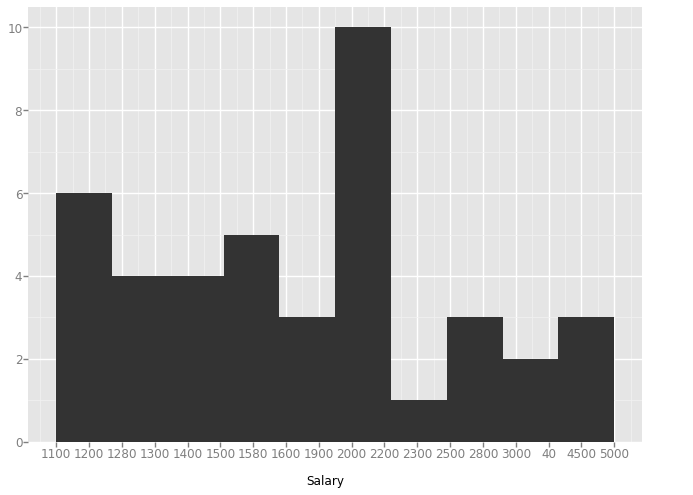

<ggplot: (13529292)>

In [93]:
from ggplot import *
ggplot(aes("Salary"),data = pd_numbersonly) + geom_histogram()

In [97]:
!pip install seaborn

In [111]:
import seaborn as sns
df = pd_numbersonly
 
# # Hist only
sns.distplot(df["Salary"], hist=True, kde=False, rug=False,)



TypeError: unsupported operand type(s) for /: 'unicode' and 'long'